# 1. 股票数据的获取

In [14]:
import tushare as ts
import pandas as pd
# import statsmodels
data=ts.get_hist_data('300165')
#industry=ts.get_stock_basics()
#print(industry.columns)
#print(type(industry)) 
#print(industry.index)
#print(industry[['name']])
#print(industry.iloc[0:1])
#print(industry)

# 2. 股票数据的分析与处理


1. 处理时间序列

In [16]:
data.index=pd.to_datetime(data.index)
data=data.sort_index()
print(data)

             open   high  close    low     volume  price_change  p_change  \
date                                                                        
2016-06-20  10.50  10.63  10.55  10.30  100072.15          0.16      1.54   
2016-06-21  10.61  10.64  10.14  10.05  120760.19         -0.41     -3.89   
2016-06-22  10.12  10.37  10.33   9.96  100691.55          0.19      1.87   
2016-06-23  10.27  10.62  10.47  10.24  160558.36          0.14      1.35   
2016-06-24  10.54  10.54  10.14   9.72  163480.31         -0.33     -3.15   
2016-06-27  10.00  10.44  10.43   9.93  154241.94          0.29      2.86   
2016-06-28  10.37  10.95  10.73  10.20  231200.77          0.30      2.88   
2016-06-29  10.86  10.87  10.61  10.52  138110.58         -0.12     -1.12   
2016-06-30  10.61  10.85  10.83  10.45  167470.78          0.22      2.07   
2016-07-01  10.72  11.09  10.66  10.62  143622.31         -0.17     -1.57   
2016-07-04  10.50  10.85  10.76  10.47  139011.34          0.10      0.94   

2. 时间缺失  

In [20]:
lst=data.index.tolist()
print(lst[0])
print(lst[-1])
print((lst[-1]-lst[0]).days)
print(data.shape[0])

2016-06-20 00:00:00
2018-12-19 00:00:00
912
558


3. 数据可视化

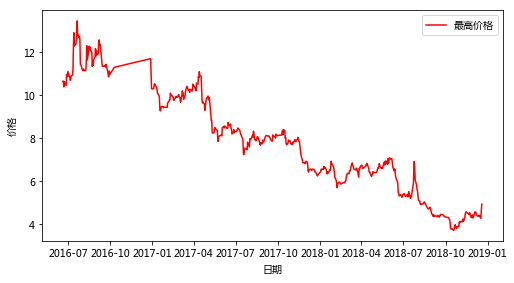

In [24]:
% matplotlib inline
import matplotlib.pyplot as plt
figure=plt.figure('股票曲线',figsize=(8,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8], xlabel='日期',ylabel='价格')
ax.plot(data[['high']],color=(1,0,0,1),label='最高价格')
plt.legend()
plt.show()

# 3. 股票的预测模型选择

1. 回归模型  
2. SVM    
3. 递归神经网络
4. 统计模型     
&emsp;&emsp;|-AR    
&emsp;&emsp;|-MA    
&emsp;&emsp;|-ARMA    
&emsp;&emsp;|-ARIMA     

# 4. 实现股票预测

1. 数据平稳性

In [29]:
from statsmodels.tsa.stattools import adfuller  as ADF
diff=0
adf=ADF(data['high'])
print(adf[1])

for i in range(10):
    diff=diff+1
    adf=ADF(data['high'].diff(diff).dropna())
    print(adf[1])
# 置信度，平稳性，觉得可以做数据预测

0.7959360932221058
2.209115641419105e-15
5.689580182173496e-08
9.527508753602399e-08
1.4250562902752933e-10
3.590901168674359e-10
1.148312485258426e-06
1.0824889885900607e-07
8.246743403390504e-07
2.9871996424777676e-05
5.180603419280509e-08


2. 训练与预测

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


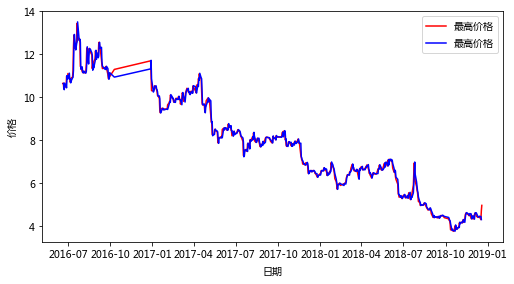

In [31]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from  statsmodels.api import *
import tushare as ts

data=ts.get_hist_data('300165')
data.index=pd.to_datetime(data.index)
data=data.sort_index()

# 预测模型
arma=tsa.ARMA(data[['high']], (1,1) )
# 训练
model=arma.fit()
# 预测
predict=model.predict(1,556)

figure=plt.figure('股票曲线',figsize=(8,4))
ax=figure.add_axes([0.1,0.1,0.8,0.8], xlabel='日期',ylabel='价格')
ax.plot(data[['high']],color=(1,0,0,1),label='最高价格')

ax.plot(predict,color=(0,0,1,1),label='最高价格')

plt.legend()
plt.show()
